# Milwaukee Crime Data Analysis 
## By: Anthony Barthell

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from flask import Flask

In [ ]:
# determining root path
#app = Flask(__name__)

In [ ]:
# routing function to root page
#@app.route('/')
#def index():
#    return 'this is the homepage'

In [ ]:
#if __name__ == "__main__":
#    app.run(debug = False)

In [3]:
# https://data.milwaukee.gov/dataset/wibr/resource/87843297-a6fa-46d4-ba5d-cb342fb2d3bb
data = pd.read_csv('data.csv')

In [4]:
tmp = data[data['ReportedDateTime'] > "2014-00-00 00:00:00"]

In [14]:
tmp.describe()

,IncidentNum,ALD,NSP,POLICE,TRACT,WARD,ZIP,RoughX,RoughY,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
count,2.134740e+05,210459.000000,128199.000000,210459.000000,210459.000000,210459.000000,210459.000000,2.104590e+05,210459.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000,213474.000000
mean,1.631422e+08,7.593018,8.881606,4.217073,25711.656646,143.674863,53212.246062,2.546790e+06,394329.227777,0.007209,0.271223,0.136921,0.099918,0.002825,0.100972,0.078736,0.022715,0.167922,0.150046
std,2.180572e+07,4.469272,5.587116,1.955831,60750.853606,84.796524,164.203030,1.063164e+04,17319.805113,0.084601,0.444592,0.343764,0.299892,0.053073,0.301293,0.269326,0.148993,0.373798,0.357118
min,1.814002e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.516466e+06,342612.886000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.511700e+08,4.000000,4.000000,3.000000,3500.000000,69.000000,53207.000000,2.539707e+06,381701.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.621301e+08,7.000000,7.000000,4.000000,7900.000000,144.000000,53212.000000,2.548267e+06,395557.731000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.731900e+08,12.000000,15.000000,6.000000,16800.000000,215.000000,53218.000000,2.554707e+06,405796.483000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.914600e+09,15.000000,19.000000,7.000000,980000.000000,325.000000,53295.000000,2.572051e+06,440857.993000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.describe()

In [128]:
data.head()

,IncidentNum,ReportedDateTime,Location,WeaponUsed,ALD,NSP,POLICE,TRACT,WARD,ZIP,...,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
0,191790038,2019-06-28 03:34:00,3255 N 89TH ST,NaN,5.0,NaN,7.0,5400.0,84.0,53222.0,...,0,0,0,0,0,0,0,0,0,1
1,191790027,2019-06-28 02:14:00,9002 W FAIRMOUNT AV,NaN,5.0,NaN,7.0,1700.0,36.0,53225.0,...,0,0,0,0,0,0,0,0,0,1
2,191790023,2019-06-28 02:01:00,4550 N 41ST ST,NONE,7.0,1.0,7.0,2600.0,64.0,53209.0,...,0,1,0,0,0,0,0,0,0,0
3,191790015,2019-06-28 01:20:00,9236 W BROWN DEER RD,PERSONAL WEAPON,9.0,NaN,4.0,201.0,2.0,53224.0,...,0,1,0,0,0,0,0,0,0,0
4,191790022,2019-06-28 00:00:00,2235 W MANGOLD AV,PERSONAL WEAPON,13.0,NaN,6.0,21700.0,315.0,53221.0,...,0,1,0,0,0,0,0,0,0,0


## Total number of Incidents by Crime

In [11]:
# Getting total number of incidents by crime
Arson = tmp.groupby('Arson').count()['IncidentNum'][1]
Assaults = tmp.groupby('AssaultOffense').count()['IncidentNum'][1]
Burglary = tmp.groupby('Burglary').count()['IncidentNum'][1]
Damage = tmp.groupby('CriminalDamage').count()['IncidentNum'][1]
Homicide = tmp.groupby('Homicide').count()['IncidentNum'][1]
LockedVehicle = tmp.groupby('LockedVehicle').count()['IncidentNum'][1]
Robbery = tmp.groupby('Robbery').count()['IncidentNum'][1]
SexOffense = tmp.groupby('SexOffense').count()['IncidentNum'][1]
Theft = tmp.groupby('Theft').count()['IncidentNum'][1]
VehicleTheft = tmp.groupby('VehicleTheft').count()['IncidentNum'][1]

In [177]:
sns.set_style("darkgrid")
sns.axes_style("darkgrid")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'grid.color': 'white',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [179]:
# temporary dataframe to display counts
totalCount = pd.DataFrame({'Type of Crime' : ['Arson', 'AssaultOffense', 'Burglary', 'CriminalDamage', 'Homicide',
                                       'LockedVehicle', 'Robbery', 'SexOffense', 'Theft', 'VehicleTheft'], 
                    'Number of Incidents' : [Arson, Assaults, Burglary, Damage, Homicide, LockedVehicle, Robbery, SexOffense, 
                               Theft, VehicleTheft]})

In [182]:
# sorting by greatest counts
totalCount = totalCount.sort_values(['Number of Incidents']).reset_index(drop = True)

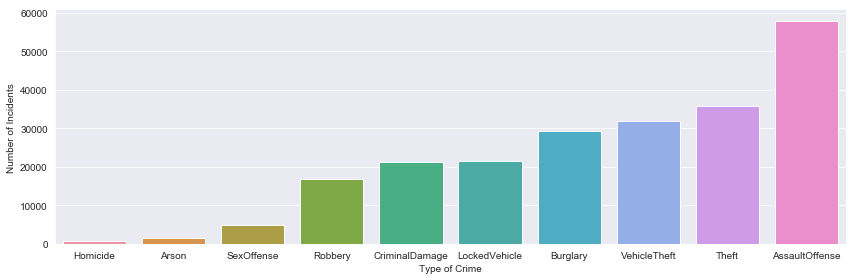

In [183]:
# Displaying barplot of crimes
sns.catplot(data = totalCount, x = "Type of Crime", y = "Number of Incidents", height = 4, kind ="bar", aspect = 3)

## Time of Crimes

In [112]:
# each letter represents an hour (00 to 23)
a, b, c, d, e, f, g, h, eight, j,k,l,m,n,o,p,q,r,s,t,u,v,w,x = 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [113]:
# getting counts of crimes in each hour (need to think of more efficient way)
for i in range(len(tmp)):
    if (tmp['ReportedDateTime'][i].split()[1][:2] == '00'):
        a+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '01'):
        b+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '02'):
        c+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '03'):
        d+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '04'):
        e+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '05'):
        f+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '06'):
        g+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '07'):
        h+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '08'):
        eight+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '09'):
        j+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '10'):
        k+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '11'):
        l+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '12'):
        m+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '13'):
        n+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '14'):
        o+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '15'):
        p+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '16'):
        q+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '17'):
        r+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '18'):
        s+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '19'):
        t+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '20'):
        u+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '21'):
        v+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '22'):
        w+=1
    elif (tmp['ReportedDateTime'][i].split()[1][:2] == '23'):
        x+=1

In [104]:
tmp['ReportedDateTime'][0].split()[1][:2]

'03'

In [114]:
hours = pd.DataFrame({'Time (military time)' : ['00', '01', '02', '03', '04','05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
                                '16', '17', '18', '19', '20','21','22','23'], 
                    'Number of Incidents' : [a, b, c, d, e, f, g, h, eight, j,k,l,m,n,o,p,q,r,s,t,u,v,w,x]})


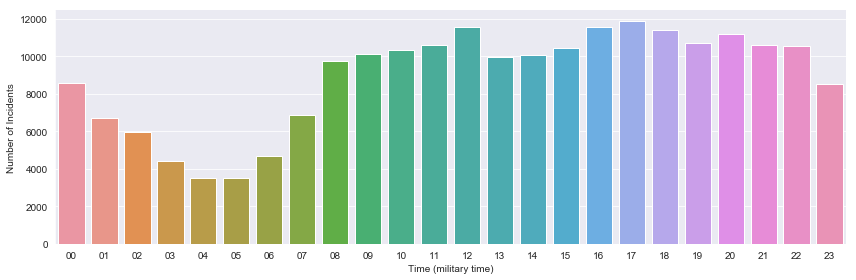

In [117]:
# Number of crimes per hour
sns.catplot(data = hours, x = "Time (military time)", y = "Number of Incidents", height = 4, kind ="bar", aspect = 3)


## Comparison of Districts

In [244]:
districts = tmp.groupby('ALD').count()[1:]

In [245]:
districts

,IncidentNum,ReportedDateTime,Location,WeaponUsed,NSP,POLICE,TRACT,WARD,ZIP,RoughX,...,Arson,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft
ALD,,,,,,,,,,,,,,,,,,,,,
1.0,17730,17730,17364,11936,14273,17730,17730,17730,17730,17730,...,17730,17730,17730,17730,17730,17730,17730,17730,17730,17730
2.0,17377,17377,17025,11735,8740,17377,17377,17377,17377,17377,...,17377,17377,17377,17377,17377,17377,17377,17377,17377,17377
3.0,12349,12349,12161,7599,1619,12349,12349,12349,12349,12349,...,12349,12349,12349,12349,12349,12349,12349,12349,12349,12349
4.0,17577,17577,17160,11373,9300,17577,17577,17577,17577,17577,...,17577,17577,17577,17577,17577,17577,17577,17577,17577,17577
5.0,10912,10912,10719,7401,767,10912,10912,10912,10912,10912,...,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912
6.0,18515,18515,18055,12628,17013,18515,18515,18515,18515,18515,...,18515,18515,18515,18515,18515,18515,18515,18515,18515,18515
7.0,19016,19016,18605,13134,17464,19016,19016,19016,19016,19016,...,19016,19016,19016,19016,19016,19016,19016,19016,19016,19016
8.0,12609,12609,12252,8547,10691,12609,12609,12609,12609,12609,...,12609,12609,12609,12609,12609,12609,12609,12609,12609,12609
9.0,12539,12539,12274,8303,2977,12539,12539,12539,12539,12539,...,12539,12539,12539,12539,12539,12539,12539,12539,12539,12539


In [246]:
districts['district'] = districts.index

In [250]:
districts = districts.sort_values(['IncidentNum']).reset_index(drop = True)

In [251]:
districts

,IncidentNum,ReportedDateTime,Location,WeaponUsed,NSP,POLICE,TRACT,WARD,ZIP,RoughX,...,AssaultOffense,Burglary,CriminalDamage,Homicide,LockedVehicle,Robbery,SexOffense,Theft,VehicleTheft,district
0,5951,5951,5785,4006,0,5951,5951,5951,5951,5951,...,5951,5951,5951,5951,5951,5951,5951,5951,5951,11.0
1,7522,7522,7340,4766,17,7522,7522,7522,7522,7522,...,7522,7522,7522,7522,7522,7522,7522,7522,7522,13.0
2,9184,9184,9022,5905,2291,9184,9184,9184,9184,9184,...,9184,9184,9184,9184,9184,9184,9184,9184,9184,14.0
3,10151,10151,9953,6827,4870,10151,10151,10151,10151,10151,...,10151,10151,10151,10151,10151,10151,10151,10151,10151,10.0
4,10912,10912,10719,7401,767,10912,10912,10912,10912,10912,...,10912,10912,10912,10912,10912,10912,10912,10912,10912,5.0
5,12349,12349,12161,7599,1619,12349,12349,12349,12349,12349,...,12349,12349,12349,12349,12349,12349,12349,12349,12349,3.0
6,12539,12539,12274,8303,2977,12539,12539,12539,12539,12539,...,12539,12539,12539,12539,12539,12539,12539,12539,12539,9.0
7,12609,12609,12252,8547,10691,12609,12609,12609,12609,12609,...,12609,12609,12609,12609,12609,12609,12609,12609,12609,8.0
8,17377,17377,17025,11735,8740,17377,17377,17377,17377,17377,...,17377,17377,17377,17377,17377,17377,17377,17377,17377,2.0
9,17436,17436,17013,11786,16626,17436,17436,17436,17436,17436,...,17436,17436,17436,17436,17436,17436,17436,17436,17436,12.0


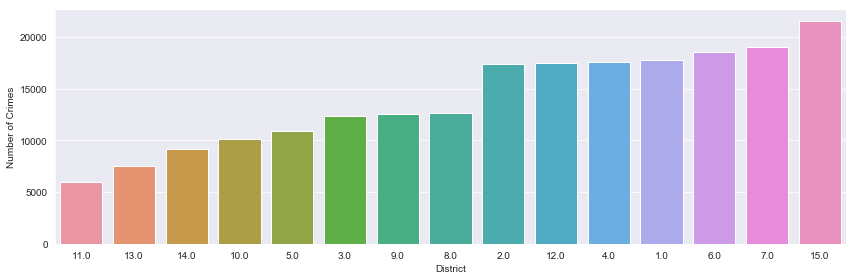

In [252]:
# Number of crimes per district
plot = sns.catplot(data = districts, x = "district", y = "IncidentNum", height = 4, kind ="bar", aspect = 3, order = districts['district'])
plot.set(xlabel='District', ylabel='Number of Crimes')
plt.show()